<a href="https://colab.research.google.com/github/palakgupta1214/Stock-Price-Prediction-using-ML/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Take input for stock symbol from user
symbol = input("Enter stock symbol: ")

Enter stock symbol: MSFT


In [ ]:
# Set start and end dates for historical data
end = pd.Timestamp.today()
start = end - pd.Timedelta(days=365) # 1 years data

# **Data**

In [ ]:
# Get historical data for chosen stock from Yahoo Finance using yfinance
data_frame = yf.download(symbol, start=start, end=end)
data_frame

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-03,283.959991,284.130005,280.149994,281.779999,279.042511,25978600
2022-05-04,282.589996,290.880005,276.730011,289.980011,287.162811,33599300
2022-05-05,285.540009,286.350006,274.339996,277.350006,274.655548,43260400
2022-05-06,274.809998,279.250000,271.269989,274.730011,272.060974,37780300
2022-05-09,270.059998,272.359985,263.320007,264.579987,262.009583,47726000
...,...,...,...,...,...,...
2023-04-26,296.700012,299.570007,292.730011,295.369995,295.369995,64599200
2023-04-27,295.970001,305.200012,295.250000,304.829987,304.829987,46462600
2023-04-28,304.010010,308.929993,303.309998,307.260010,307.260010,36446700


# **Correlation**

In [ ]:
# Calculate the correlation matrix
corr_matrix = data_frame.corr()

# Display the correlation matrix
print(corr_matrix)

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.990599  0.991281  0.975591   0.974575 -0.125184
High       0.990599  1.000000  0.991023  0.990442   0.988971 -0.081892
Low        0.991281  0.991023  1.000000  0.989837   0.989656 -0.152383
Close      0.975591  0.990442  0.989837  1.000000   0.999145 -0.117298
Adj Close  0.974575  0.988971  0.989656  0.999145   1.000000 -0.115510
Volume    -0.125184 -0.081892 -0.152383 -0.117298  -0.115510  1.000000


<Axes: >

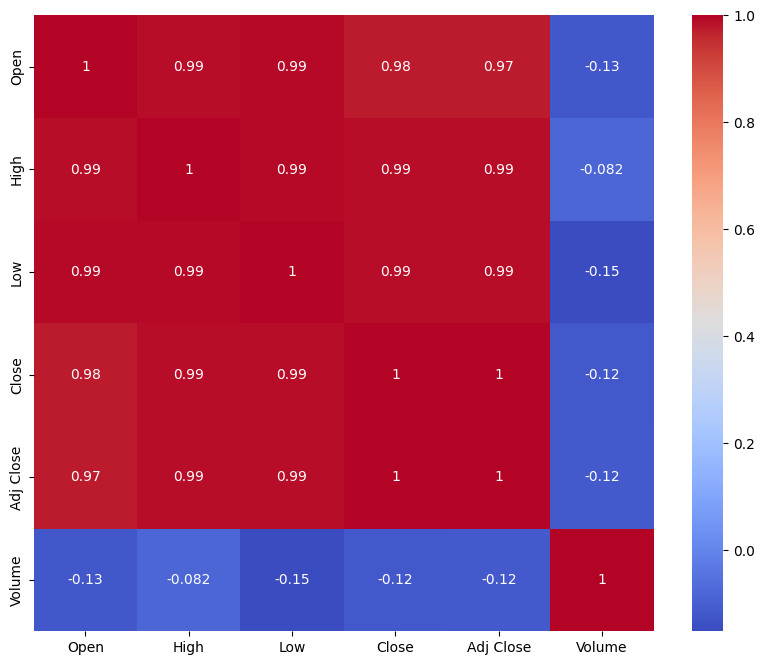

In [ ]:
# Plot the correlation matrix as a heatmap
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [ ]:
# Numeric Values
numeric_feature=data_frame.select_dtypes(include=[np.number])
numeric_feature.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
# We have to ignore Day and Diff_Close_Price
correlation=numeric_feature.corr()
print(correlation['Close'].sort_values(ascending=False),'\n')

Close        1.000000
Adj Close    0.999145
High         0.990442
Low          0.989837
Open         0.975591
Volume      -0.117298
Name: Close, dtype: float64 



Index(['Close', 'Adj Close', 'High', 'Low', 'Open'], dtype='object')


<Axes: >

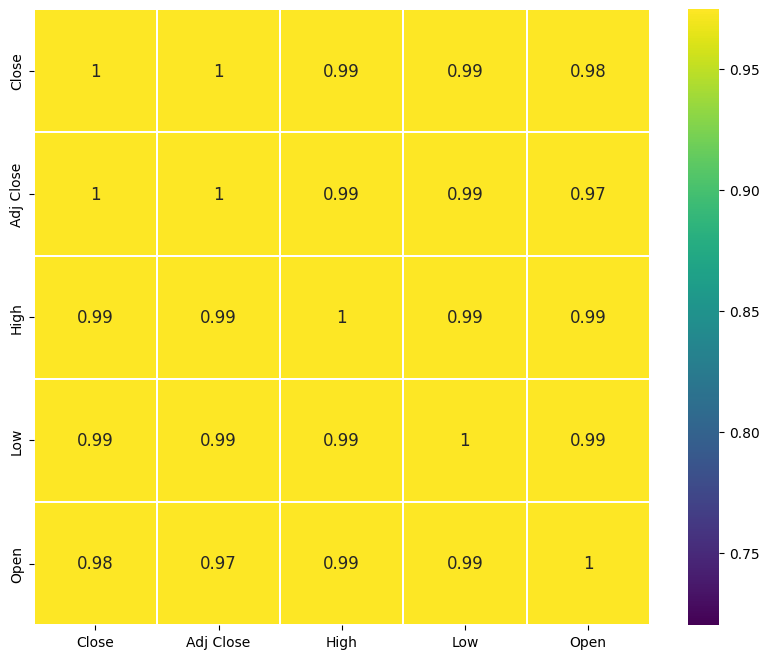

In [ ]:
# We are considering Threshold Value > 0.9
# Heat Map of Features (Threshold Value > 0.9)
k=5
cols=correlation.nlargest(k,'Close')['Close'].index
print(cols)
cm=np.corrcoef(data_frame[cols].values.T)
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(cm, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='viridis', linecolor="white", xticklabels=cols.values, annot_kws={'size':12}, yticklabels=cols.values)

In [ ]:
# Rest we drop because their correlation value is too low
# Dropping Featutes
df=data_frame.drop(['Volume'],axis=1)
df

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-05-03,283.959991,284.130005,280.149994,281.779999,279.042511
2022-05-04,282.589996,290.880005,276.730011,289.980011,287.162811
2022-05-05,285.540009,286.350006,274.339996,277.350006,274.655548
2022-05-06,274.809998,279.250000,271.269989,274.730011,272.060974
2022-05-09,270.059998,272.359985,263.320007,264.579987,262.009583
...,...,...,...,...,...
2023-04-26,296.700012,299.570007,292.730011,295.369995,295.369995
2023-04-27,295.970001,305.200012,295.250000,304.829987,304.829987
2023-04-28,304.010010,308.929993,303.309998,307.260010,307.260010


# **Check for Multicollinearity**

## **From VIF Factor**

In [ ]:
# Checking for Multicollinearity
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the Predictor Variables(Features) and the Response Variable(Target Variable)
c = df[['Open', 'High', 'Low', 'Adj Close']]
d = df['Close']

# Fit the linear regression model
model = sm.OLS(d, sm.add_constant(c)).fit() # OLS (Ordinary Least Squares) model is a type of linear regression model used to estimate the relationship between a dependent variable(Close) and one or more independent variables

# Check for multicollinearity using variance inflation factor (VIF)
vif = pd.DataFrame()
vif['variables'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
print(vif)

   variables           VIF
0       Open  25462.386230
1       High  26480.774973
2        Low  31515.210932
3  Adj Close  20112.877443


In [ ]:
# The VIF measures the degree of multicollinearity for each predictor variable,
# If the VIF value is above 10, it is usually considered high and suggests that there is significant multicollinearity among the predictor variables.
# So, we will drop "Open","High","Low","Adj Close" because of high multicollinearity.

In [ ]:
# Dropping Featutes
final_data=df.drop(['Open', 'High', 'Low', 'Adj Close'],axis=1)
final_data

,Close
Date,
2022-05-03,281.779999
2022-05-04,289.980011
2022-05-05,277.350006
2022-05-06,274.730011
2022-05-09,264.579987
...,...
2023-04-26,295.369995
2023-04-27,304.829987
2023-04-28,307.260010


# **Visualization**

## **Line chart: It displays the Trend and Seasonality**

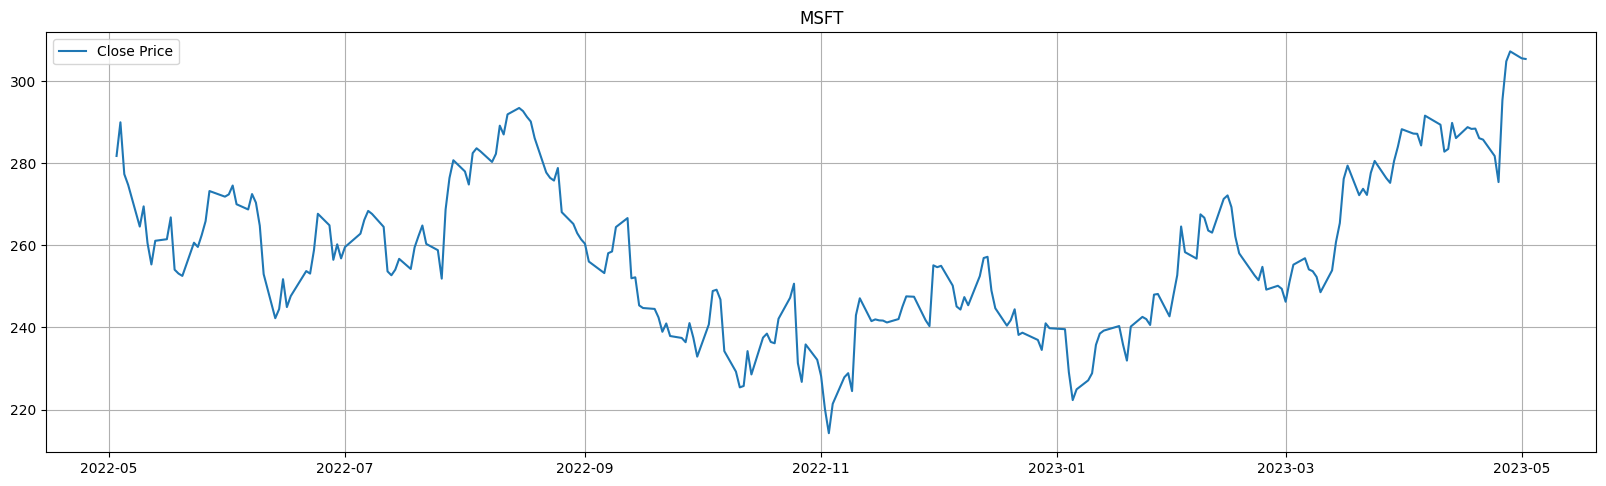

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.plot(final_data.Close, label='Close Price')
plt.title(symbol)
plt.legend()
plt.grid()
plt.show()

### **1. Checking Trend**

In [ ]:
# 1. Trend is Upward and Non-Linear
# 2. Non-Stationary Time Series
    # No constant mean
    # No constant variance

### **2. Checking Seasonality: Repeating Trends/Pattern over time**

In [ ]:
# As such no Seasonality in the graph

In [ ]:
# We will go for ARIMA (Autoregressive Integrated Moving Average)
# ARIMA, meaning that they only consider the past values of the target variable (univariate dataset).

# Linear Regression Model:-

In [ ]:
# Create a new column 'Day' to hold day numbers as integers
final_data.reset_index(inplace=True)
final_data['Day'] = np.arange(len(final_data))
final_data

,Date,Close,Day
0,2022-05-03,281.779999,0
1,2022-05-04,289.980011,1
2,2022-05-05,277.350006,2
3,2022-05-06,274.730011,3
4,2022-05-09,264.579987,4
...,...,...,...
246,2023-04-26,295.369995,246
247,2023-04-27,304.829987,247
248,2023-04-28,307.260010,248
249,2023-05-01,305.559998,249


In [ ]:
# Split the data into train and test sets
train_data = final_data.iloc[:-60, :]   # use first n-60 days for training
test_data = final_data.iloc[-60:, :]    # use last 60 days for testing

In [ ]:
# Fit a linear regression model to the training data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_data[['Day']], train_data['Close'])

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_data[['Day']], test_data['Close']))

53.60137219619258

In [ ]:
from sklearn.metrics import r2_score
r2_score(test_data[['Day']], test_data['Close'])

-8.579684694575494

In [ ]:
# Predict future stock prices
from datetime import date, timedelta
future_days = 10   # number of days for future forecast
future = pd.DataFrame({'Day': np.arange(len(final_data) + 1, len(final_data) + 1 + future_days)})
future['Date'] = [end + timedelta(days=i + 1) for i in range(future_days)]

In [ ]:
# Set a maximum increase of 20% on predicted values
prev_close = final_data.loc[len(final_data) - 1, 'Close']
for i in range(len(future)):
    if i == 0:
        future.loc[i, 'Close'] = prev_close
    else:
        predicted_close = regressor.predict([[len(final_data) + i]])[0]
        max_increase = prev_close * 0.2
        for j in range(5):
            if len(final_data) - j - 1 >= 0:
                max_increase = max(max_increase, final_data.loc[len(final_data) - j - 1, 'Close'] * 0.2)
            if len(future) - j - 1 >= 0:
                max_increase = max(max_increase, future.loc[len(future) - j - 1, 'Close'] * 0.2)
        if predicted_close > prev_close + max_increase:
            future.loc[i, 'Close'] = prev_close + max_increase
        else:
            future.loc[i, 'Close'] = predicted_close
        prev_close = future.loc[i, 'Close']

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [ ]:
# Print dataset and predicted values
print("Historical Data:")
print(final_data)
print("\nPredicted Values:")
print(future)

Historical Data:
          Date       Close  Day
0   2022-05-03  281.779999    0
1   2022-05-04  289.980011    1
2   2022-05-05  277.350006    2
3   2022-05-06  274.730011    3
4   2022-05-09  264.579987    4
..         ...         ...  ...
246 2023-04-26  295.369995  246
247 2023-04-27  304.829987  247
248 2023-04-28  307.260010  248
249 2023-05-01  305.559998  249
250 2023-05-02  305.410004  250

[251 rows x 3 columns]

Predicted Values:
   Day                       Date       Close
0  252 2023-05-04 02:10:47.350763  305.410004
1  253 2023-05-05 02:10:47.350763  223.343061
2  254 2023-05-06 02:10:47.350763  223.154734
3  255 2023-05-07 02:10:47.350763  222.966407
4  256 2023-05-08 02:10:47.350763  222.778080
5  257 2023-05-09 02:10:47.350763  222.589753
6  258 2023-05-10 02:10:47.350763  222.401426
7  259 2023-05-11 02:10:47.350763  222.213098
8  260 2023-05-12 02:10:47.350763  222.024771
9  261 2023-05-13 02:10:47.350763  221.836444


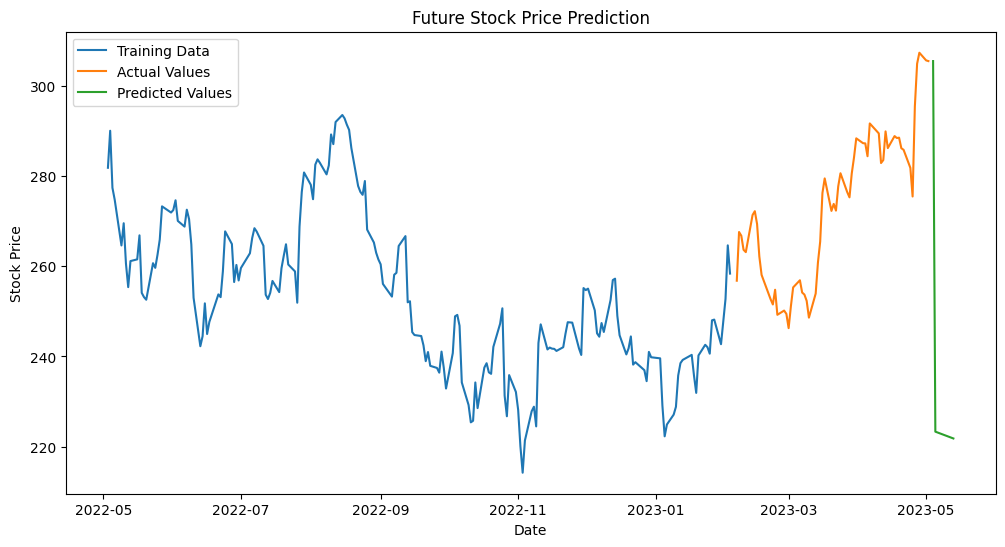

In [ ]:
# Plot actual and predicted values on a graph
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Close'], label='Training Data')
plt.plot(test_data['Date'], test_data['Close'], label='Actual Values')
plt.plot(future['Date'], future['Close'], label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Future Stock Price Prediction')
plt.legend()
plt.show()